In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns


In [2]:
x=np.linspace(0,13,1000)
anom=np.zeros_like(x)
anom_x=x[np.argwhere((x>4.3)&(x<5.27))]
anom_x_index=np.argwhere((x>4.3)&(x<5.27))
anom[np.argwhere((x>4.3)&(x<5.27))]=1.1
gt=np.sin(x)+anom+np.random.randn(x.shape[0])*0.06
y_anom=gt[anom_x_index]


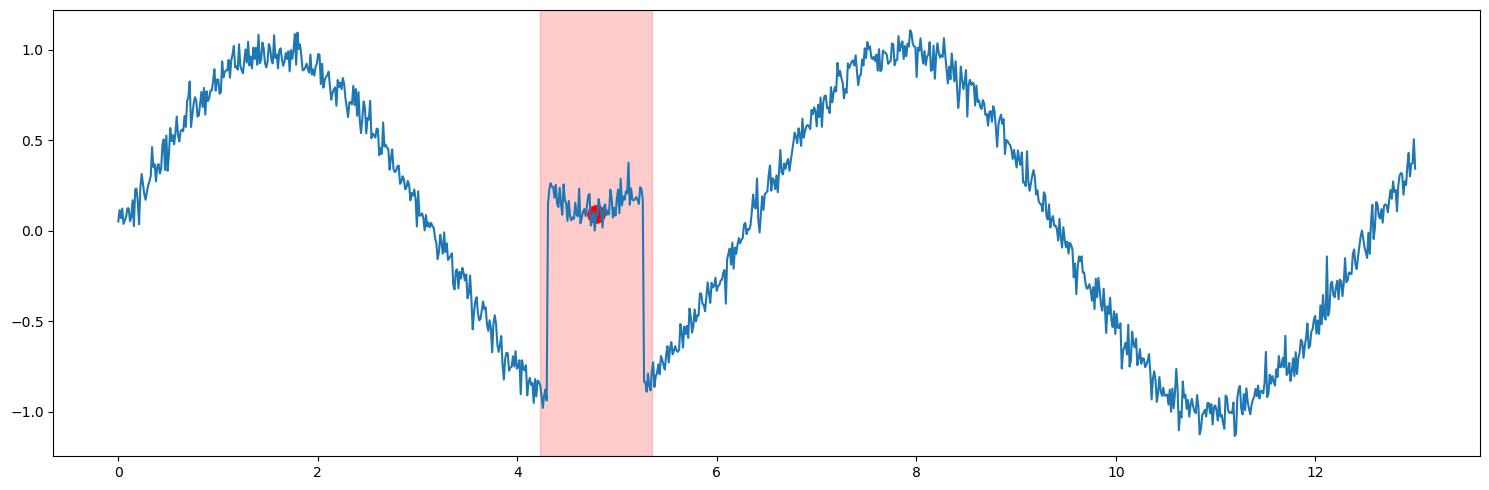

In [3]:
plt.figure(figsize=(15,5))
plt.plot(x,gt)
plt.axvspan(4.23,5.35,color="red",alpha=0.2)
plt.scatter(anom_x[anom_x.shape[0]//2],y_anom[anom_x.shape[0]//2],s=154,color="red",label="Anomalía a reconstruir")
#plt.yticks([])
plt.tight_layout()

In [4]:
model_pred=np.ones_like(x)*0.57+np.random.randn(x.shape[0])*0.06

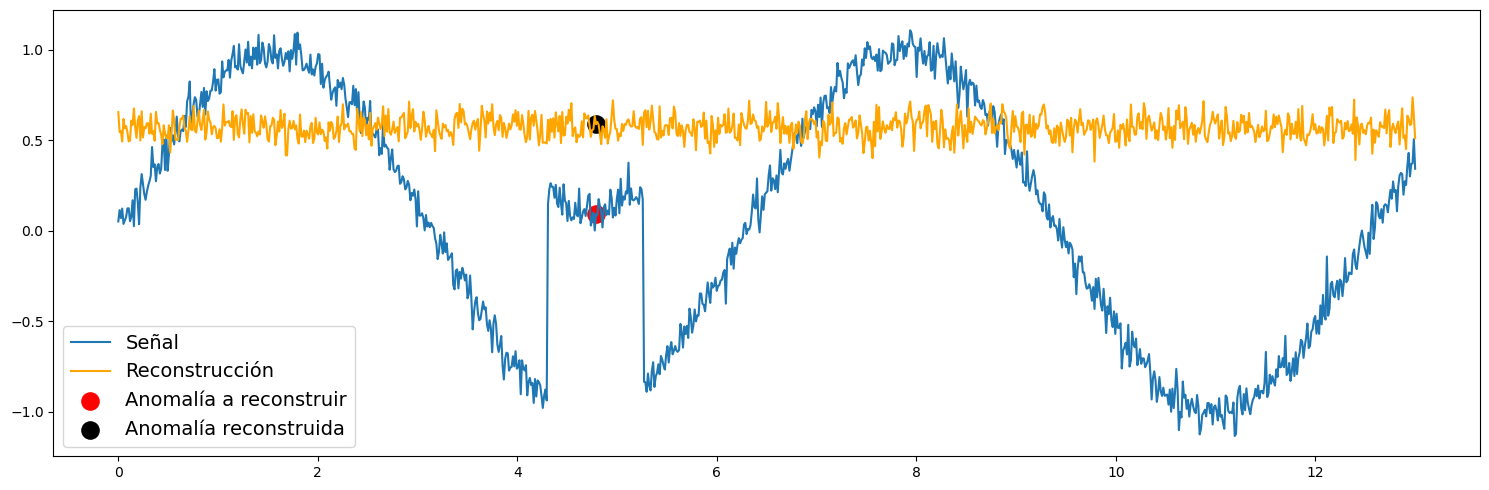

In [5]:
plt.figure(figsize=(15,5))
plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred,color="orange",label="Reconstrucción")
plt.scatter(anom_x[anom_x.shape[0]//2],y_anom[anom_x.shape[0]//2],s=154,color="red",label="Anomalía a reconstruir")
plt.scatter(anom_x[anom_x.shape[0]//2],model_pred[anom_x_index[anom_x.shape[0]//2]],color="black",s=154,label="Anomalía reconstruida")
#plt.axvspan(4.6,4.95,color="red",alpha=0.2)
#plt.yticks([])
plt.legend(fontsize=14)
plt.tight_layout()

In [6]:
def gaussian(x,mu,altura,magnitud):
    return 1/(magnitud)*np.exp(-(mu-x)**2/magnitud)+altura

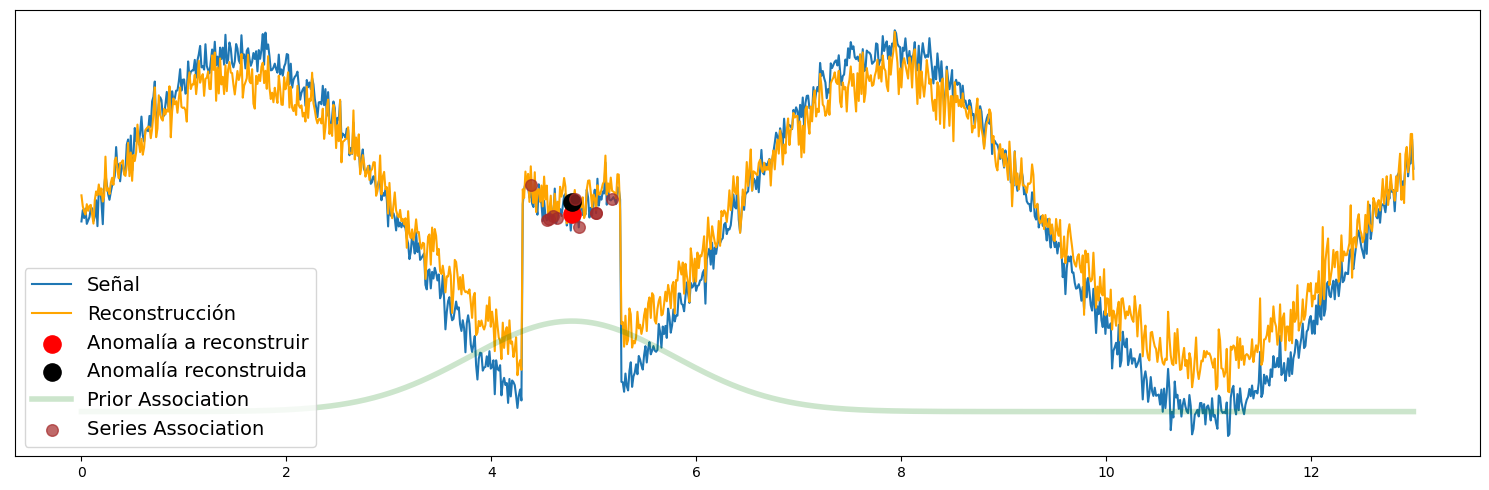

In [7]:
model_pred2=model_pred+gt*0.8-0.5

plt.figure(figsize=(15,5))
plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred2,color="orange",label="Reconstrucción")
plt.scatter(anom_x[anom_x.shape[0]//2],y_anom[anom_x.shape[0]//2],s=154,color="red",label="Anomalía a reconstruir",zorder=3)
plt.scatter(anom_x[anom_x.shape[0]//2],model_pred2[anom_x_index[anom_x.shape[0]//2]],color="black",s=154,label="Anomalía reconstruida",zorder=3)
#añadimos la prior kernel
plt.plot(x,gaussian(x,anom_x[anom_x.shape[0]//2],-1,2),color="green",label="Prior Association",linewidth=4,alpha=0.2)
choice_index=np.random.choice(anom_x_index.squeeze(),10)
plt.scatter(x[choice_index],gt[choice_index],color="brown",s=70,alpha=0.7,zorder=3,label="Series Association")
plt.yticks([])
plt.legend(fontsize=14,loc="lower left")
plt.tight_layout()

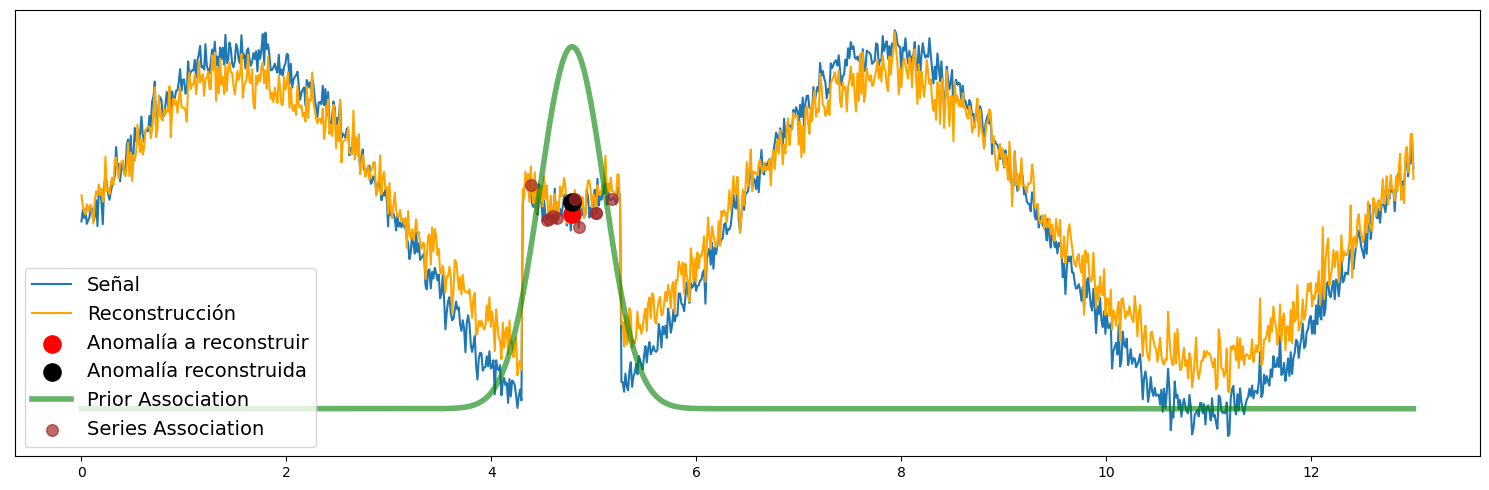

In [8]:
#model_pred2=model_pred+gt*0.4-0.5

def gaussian(x,mu,altura,magnitud):
    return 1/(magnitud)*np.exp(-(mu-x)**2/magnitud)*0.5+altura

plt.figure(figsize=(15,5))
plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred2,color="orange",label="Reconstrucción")
plt.scatter(anom_x[anom_x.shape[0]//2],y_anom[anom_x.shape[0]//2],s=154,color="red",label="Anomalía a reconstruir",zorder=3)
plt.scatter(anom_x[anom_x.shape[0]//2],model_pred2[anom_x_index[anom_x.shape[0]//2]],color="black",s=154,label="Anomalía reconstruida",zorder=3)
#añadimos la prior kernel
plt.plot(x,gaussian(x,anom_x[anom_x.shape[0]//2],-1.23,0.2)*0.8,color="green",label="Prior Association",linewidth=4,alpha=0.6)
#choice_index=np.random.choice(anom_x_index.squeeze(),10)
plt.scatter(x[choice_index],gt[choice_index],color="brown",s=70,alpha=0.7,zorder=3,label="Series Association")
plt.yticks([])
plt.legend(fontsize=14,loc="lower left")
plt.tight_layout()

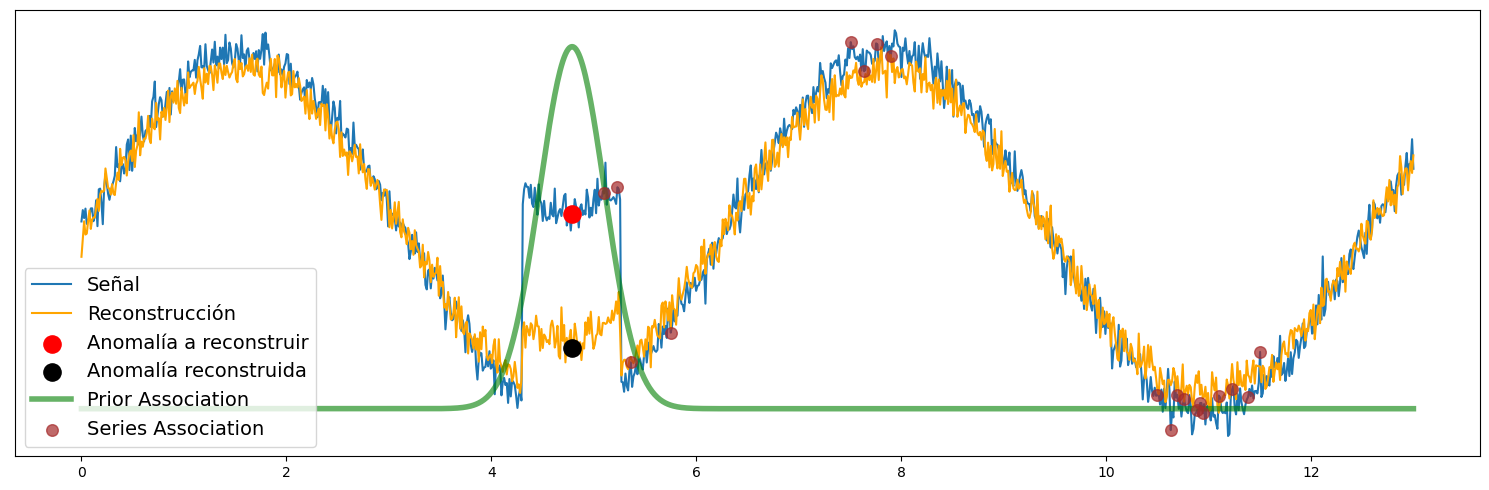

In [9]:
model_pred3=np.sin(x)*0.9+np.random.randn(x.shape[0])*0.06
model_pred3[anom_x_index]=model_pred3[anom_x_index]+0.3

def gaussian(x,mu,altura,magnitud):
    return 1/(magnitud)*np.exp(-(mu-x)**2/magnitud)*0.5+altura

plt.figure(figsize=(15,5))
plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred3,color="orange",label="Reconstrucción")
plt.scatter(anom_x[anom_x.shape[0]//2],y_anom[anom_x.shape[0]//2],s=154,color="red",label="Anomalía a reconstruir",zorder=3)
plt.scatter(anom_x[anom_x.shape[0]//2],model_pred3[anom_x_index[anom_x.shape[0]//2]],color="black",s=154,label="Anomalía reconstruida",zorder=3)
#añadimos la prior kernel
plt.plot(x,gaussian(x,anom_x[anom_x.shape[0]//2],-1.23,0.2)*0.8,color="green",label="Prior Association",linewidth=4,alpha=0.6)
#choice_index=np.random.choice(anom_x_index.squeeze(),10)
aux_index_1=np.argwhere(x>10.5)[[0,10,15,20,30,34,32,46,68,77,56]]
aux_index_2=np.argwhere(x>7.5)[[0,10,20,30]]
aux_index_3=np.argwhere(x>5.1)[[0,10,50,20]]
plt.scatter(x[aux_index_1],gt[aux_index_1],color="brown",s=70,alpha=0.7,zorder=3,label="Series Association")
plt.scatter(x[aux_index_2],gt[aux_index_2],color="brown",s=70,alpha=0.7,zorder=3)
plt.scatter(x[aux_index_3],gt[aux_index_3],color="brown",s=70,alpha=0.7,zorder=3)
plt.yticks([])


plt.legend(fontsize=14,loc="lower left")
plt.tight_layout()

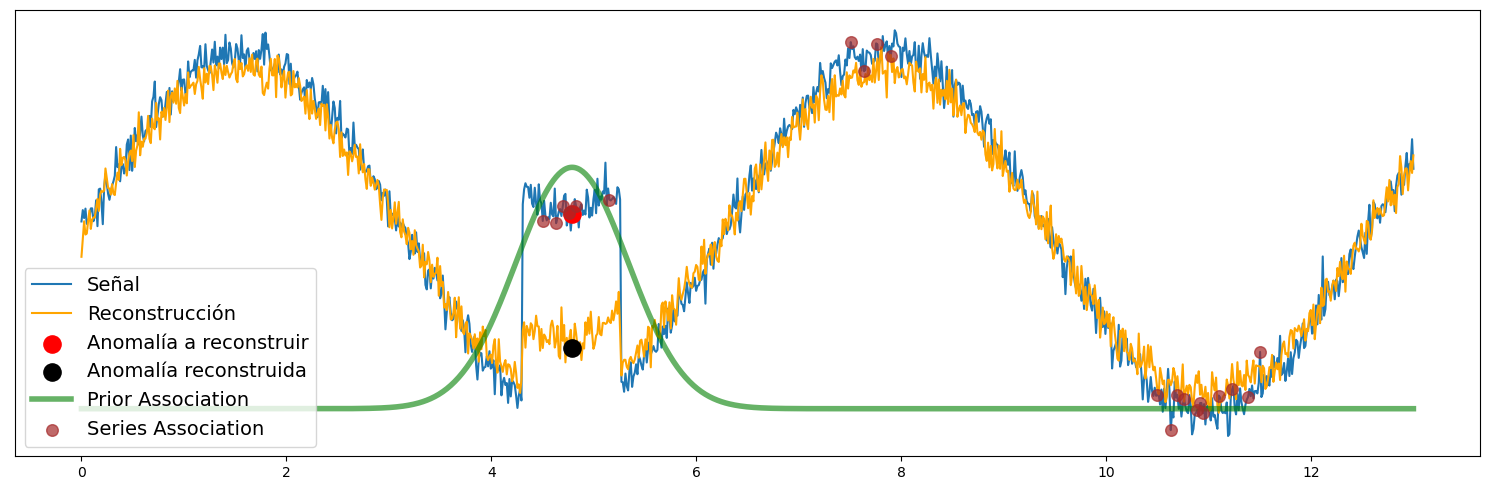

In [10]:
# model_pred3=np.sin(x)*0.9+np.random.randn(x.shape[0])*0.06
# model_pred3[anom_x_index]=model_pred3[anom_x_index]+0.8

def gaussian(x,mu,altura,magnitud):
    return 1/(magnitud)*np.exp(-(mu-x)**2/magnitud)+altura

plt.figure(figsize=(15,5))
plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred3,color="orange",label="Reconstrucción")
plt.scatter(anom_x[anom_x.shape[0]//2],y_anom[anom_x.shape[0]//2],s=154,color="red",label="Anomalía a reconstruir",zorder=3)
plt.scatter(anom_x[anom_x.shape[0]//2],model_pred3[anom_x_index[anom_x.shape[0]//2]],color="black",s=154,label="Anomalía reconstruida",zorder=3)
#añadimos la prior kernel
plt.plot(x,gaussian(x,anom_x[anom_x.shape[0]//2],-1.23,0.6)*0.8,color="green",label="Prior Association",linewidth=4,alpha=0.6)
#choice_index=np.random.choice(anom_x_index.squeeze(),10)
aux_index_1=np.argwhere(x>10.5)[[0,10,15,20,30,34,32,46,68,77,56]]
aux_index_2=np.argwhere(x>7.5)[[0,10,20,30]]
aux_index_3=np.argwhere(x>4.5)[[0,10,25,15,50,20]]
plt.scatter(x[aux_index_1],gt[aux_index_1],color="brown",s=70,alpha=0.7,zorder=3,label="Series Association")
plt.scatter(x[aux_index_2],gt[aux_index_2],color="brown",s=70,alpha=0.7,zorder=3)
plt.scatter(x[aux_index_3],gt[aux_index_3],color="brown",s=70,alpha=0.7,zorder=3)

plt.yticks([])

plt.legend(fontsize=14,loc="lower left")
plt.tight_layout()

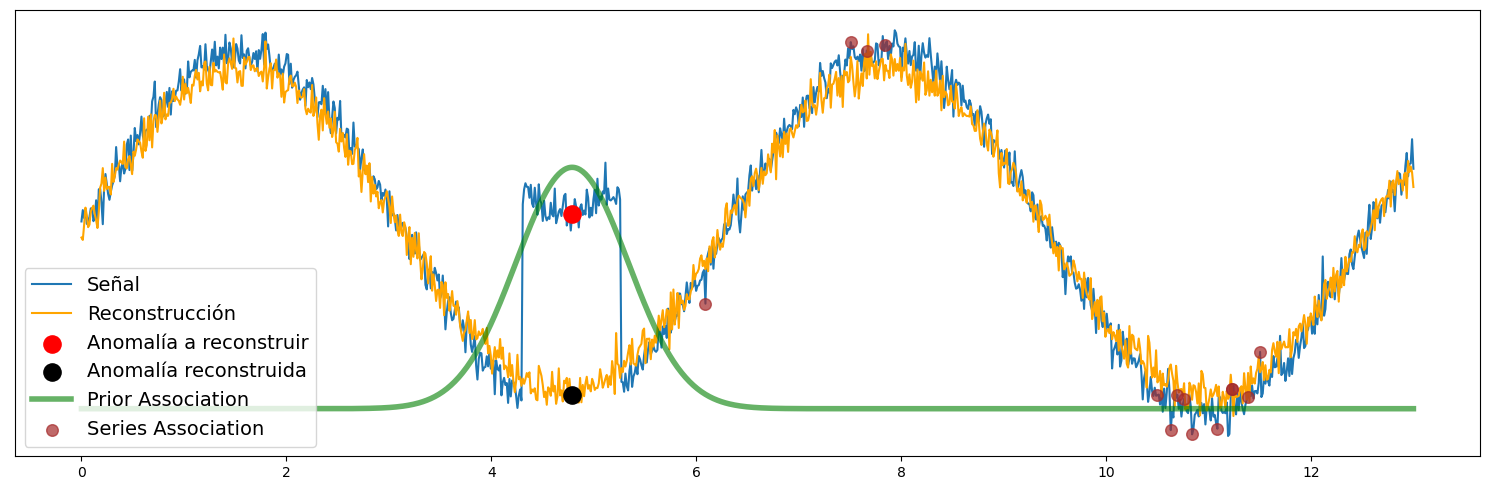

In [11]:
model_pred3=np.sin(x)*0.9+np.random.randn(x.shape[0])*0.06
model_pred3[anom_x_index]=model_pred3[anom_x_index]+0.01

def gaussian(x,mu,altura,magnitud):
    return 1/(magnitud)*np.exp(-(mu-x)**2/magnitud)+altura

plt.figure(figsize=(15,5))
plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred3,color="orange",label="Reconstrucción")
plt.scatter(anom_x[anom_x.shape[0]//2],y_anom[anom_x.shape[0]//2],s=154,color="red",label="Anomalía a reconstruir",zorder=3)
plt.scatter(anom_x[anom_x.shape[0]//2],model_pred3[anom_x_index[anom_x.shape[0]//2]],color="black",s=154,label="Anomalía reconstruida",zorder=3)
#añadimos la prior kernel
plt.plot(x,gaussian(x,anom_x[anom_x.shape[0]//2],-1.23,0.6)*0.8,color="green",label="Prior Association",linewidth=4,alpha=0.6)
#choice_index=np.random.choice(anom_x_index.squeeze(),10)
aux_index_1=np.argwhere(x>10.5)[[0,10,15,20,26,45,56,68,77,56]]
aux_index_2=np.argwhere(x>7.5)[[0,12,26]]
aux_index_3=np.argwhere(x>4.2)[[145]]
plt.scatter(x[aux_index_1],gt[aux_index_1],color="brown",s=70,alpha=0.7,zorder=3,label="Series Association")
plt.scatter(x[aux_index_2],gt[aux_index_2],color="brown",s=70,alpha=0.7,zorder=3)
plt.scatter(x[aux_index_3],gt[aux_index_3],color="brown",s=70,alpha=0.7,zorder=3)

plt.yticks([])

plt.legend(fontsize=14,loc="lower left")
plt.tight_layout()

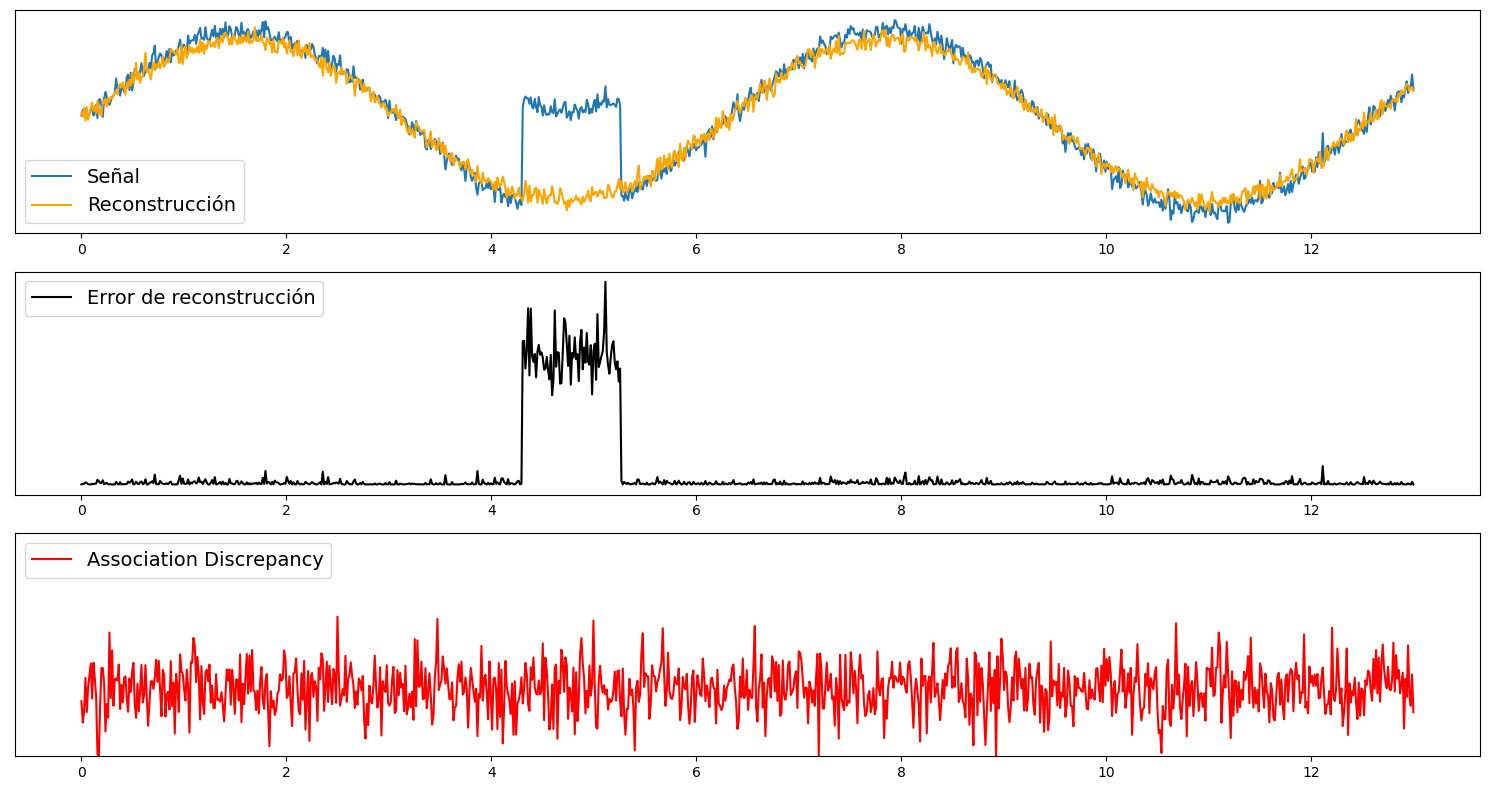

In [29]:
model_pred3=np.sin(x)*0.9+np.random.randn(x.shape[0])*0.06
model_pred3[anom_x_index]=model_pred3[anom_x_index]+0.01

def gaussian(x,mu,altura,magnitud):
    return 1/(magnitud)*np.exp(-(mu-x)**2/magnitud)+altura

plt.figure(figsize=(15,8))


plt.subplot(3,1,1)
plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred3,color="orange",label="Reconstrucción")
plt.yticks([])
plt.legend(fontsize=14,loc="lower left")


plt.subplot(3,1,2)
plt.plot(x,(model_pred3-gt)**2,color="black",label="Error de reconstrucción")
plt.yticks([])
plt.legend(fontsize=14,loc="upper left")

plt.subplot(3,1,3)
plt.plot(x,np.random.randn(x.shape[0]),color="red",label="Association Discrepancy")
plt.yticks([])
plt.ylim([-3,7])
plt.legend(fontsize=14,loc="upper left")



plt.tight_layout()

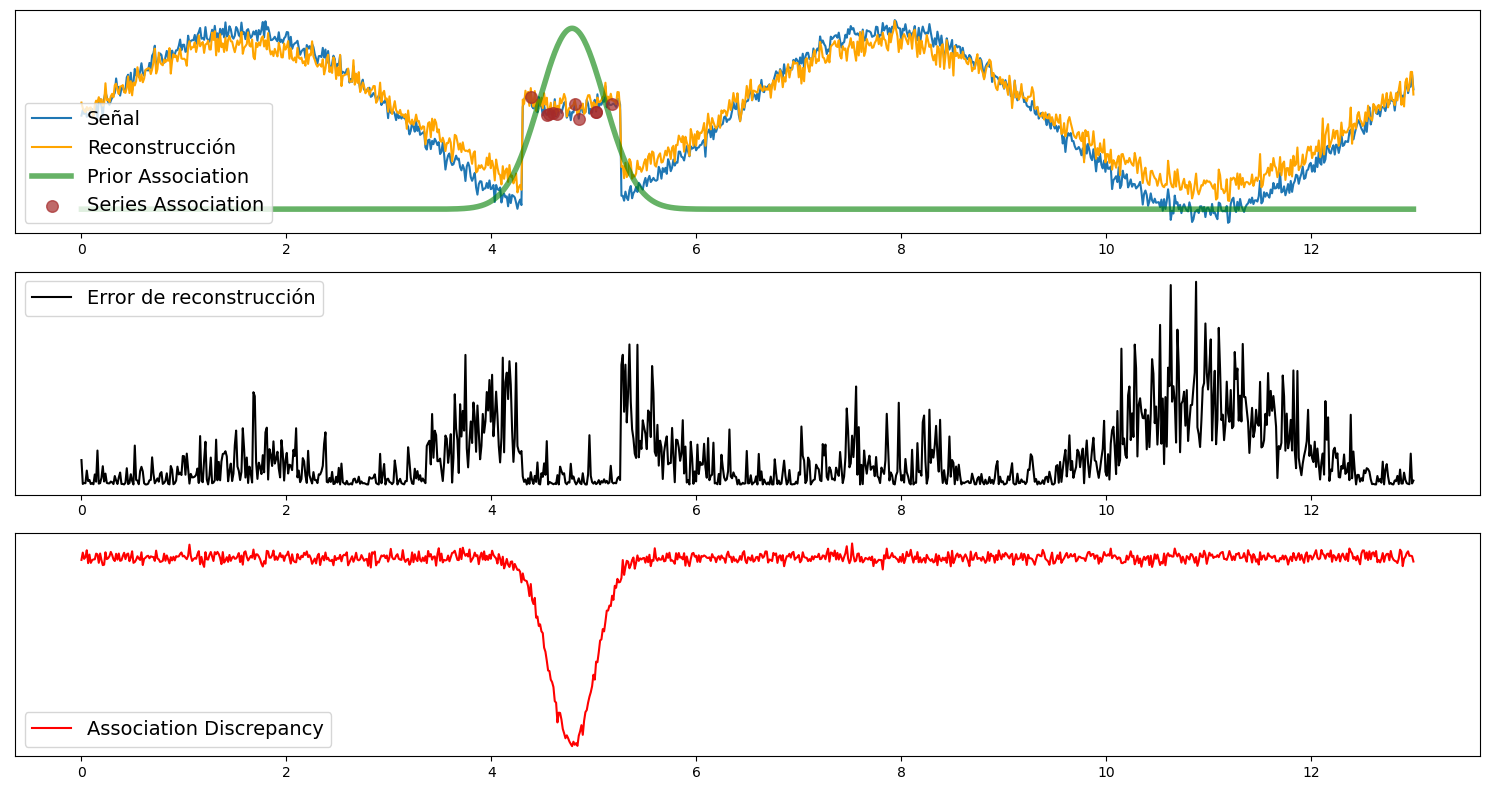

In [42]:
#model_pred2=model_pred+gt*0.4-0.5

def gaussian(x,mu,altura,magnitud):
    return 1/(magnitud)*np.exp(-(mu-x)**2/magnitud)*0.5+altura

plt.figure(figsize=(15,8))
plt.subplot(3,1,1)

plt.plot(x,gt,label="Señal")#,color="blue"
plt.plot(x,model_pred2,color="orange",label="Reconstrucción")
#añadimos la prior kernel
plt.plot(x,gaussian(x,anom_x[anom_x.shape[0]//2],-1.23,0.2)*0.8,color="green",label="Prior Association",linewidth=4,alpha=0.6)
#choice_index=np.random.choice(anom_x_index.squeeze(),10)
plt.scatter(x[choice_index],gt[choice_index],color="brown",s=70,alpha=0.7,zorder=3,label="Series Association")
plt.yticks([])
plt.legend(fontsize=14,loc="lower left")



plt.subplot(3,1,2)
plt.plot(x,(model_pred2-gt)**2,color="black",label="Error de reconstrucción")
plt.yticks([])
plt.legend(fontsize=14,loc="upper left")

plt.subplot(3,1,3)
#aux1=np.zeros_like(x)
aux1=-gaussian(x,anom_x[anom_x.shape[0]//2],-1.23,0.1)*9
plt.plot(x,np.random.randn(x.shape[0])+aux1,color="red",label="Association Discrepancy")
plt.yticks([])
#plt.ylim([-3,7])
plt.legend(fontsize=14,loc="lower left")



plt.tight_layout()